In [175]:
''' Import libraries '''
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from mlxtend.evaluate import bias_variance_decomp
import numpy as np

In [176]:
''' Load data '''
file_path = "Heart_Disease_Prediction.csv" # Make sure to change this
df_all = pd.read_csv(file_path).drop(["index"], axis=1)

features_target = df_all['Heart Disease']

int_convert = []
for x in range(len(features_target)):
    if(features_target[x] == "Presence"):
        int_convert.append(1)
    else:
        int_convert.append(0)

#define features and classification
features_target = pd.DataFrame(data = int_convert, columns= ["Heart Disease"])
features_target = features_target['Heart Disease']
features = df_all.drop(['BP', 'Cholesterol', 'FBS over 120', 'EKG results','Heart Disease'], axis = 1)

#train test split
x_train, x_test, y_train, y_test = train_test_split(features, features_target)



# Model

In [177]:
model = QuadraticDiscriminantAnalysis()

# Hyperparamater Tuning

In [178]:
params = [{'reg_param': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
qda_grid_search = GridSearchCV(model, params, cv = cv)
result = qda_grid_search.fit(x_train, y_train)
print("This is the best paramater for the qda model: ", result.best_params_)


This is the best paramater for the qda model:  {'reg_param': 0.01}


In [179]:
#grabbing the best paramater value in the dictionary
best_param_dict = result.best_params_.values()
best_param_value = sum(best_param_dict)
best_param_value

0.01

# Bias Variance Tradeoff

In [180]:
y_bias = []
y_var = []
for param in reg_param:
    best_qda_model = QuadraticDiscriminantAnalysis(reg_param = param)
    best_qda_model.fit(x_train, y_train)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        best_qda_model, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss')
    y_bias.append(avg_bias)
    y_var.append(avg_var)


Text(0, 0.5, 'Bias - Variance')

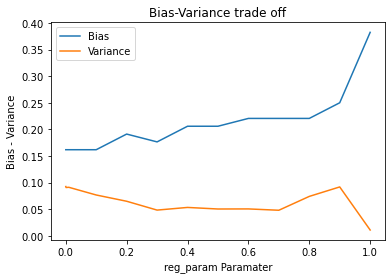

In [181]:
plt.plot(reg_param, y_bias)
plt.plot(reg_param, y_var)
plt.legend(['Bias','Variance'])
plt.title("Bias-Variance trade off")
plt.xlabel("reg_param Paramater")
plt.ylabel("Bias - Variance")

# Best Model

In [182]:
best_qda_model = QuadraticDiscriminantAnalysis(reg_param = best_param_value)
best_qda_model.fit(x_train, y_train)
best_qda_model.score(x_train, y_train)

0.8861386138613861

# Predict Values

In [183]:
y_pred=best_qda_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1])

# Cross Validation Score

In [184]:
scores = cross_val_score(best_qda_model, features, features_target, scoring='accuracy', cv=cv, n_jobs=-1)
print("The cross validation accuracy score is: ", np.mean(scores)) 

The cross validation accuracy score is:  0.839506172839506


# ROC Curve

The area under the curve is:  0.8090909090909091


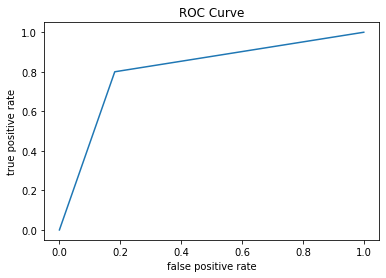

In [185]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.plot(false_positive_rate, true_positive_rate)
plt.title("ROC Curve")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
area_under_curve = roc_auc_score(y_test, y_pred)
print("The area under the curve is: ", area_under_curve)

# Confusion Matrix

In [186]:
qda_conf_mat = confusion_matrix(y_test, y_pred)
qda_conf_mat

array([[27,  6],
       [ 7, 28]])

# F-Score

In [187]:
target_names = ['class Presence', 'class Abscence']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

class Presence       0.79      0.82      0.81        33
class Abscence       0.82      0.80      0.81        35

      accuracy                           0.81        68
     macro avg       0.81      0.81      0.81        68
  weighted avg       0.81      0.81      0.81        68



# Bias Variance

In [188]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        best_qda_model, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss')
print("this is the average bias: ", avg_bias)
print("this is the average variance: ", avg_var)

this is the average bias:  0.17647058823529413
this is the average variance:  0.08977941176470589
